# Assignment 3


**Name:** Tamilarasee Sethuraj (A20553416)

Due by 11:59pm, Apr. 17, 2024

## Theory Questions (Question 1: 5 points, Question 2: 5 points, Question 3: 10 points)

***

1. The below shows the input image and a kernel filter. Please compute the convolution of the input image with the kernel filter, stride =1.

Input:

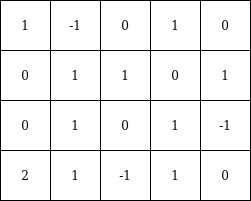

Kernel:

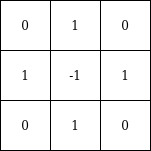

a)With zero padding and padding=1.

b)Without padding.





In [1]:
# Without padding
import numpy as np

input = np.array([[1,-1,0,1,0],
                 [0,1,1,0,1],
                 [0,1,0,1,-1],
                 [2,1,-1,1,0]])

kernel = np.array([[0,1,0],
                  [1,-1,1],
                  [0,1,0]])

filter_size = kernel.shape[0]
stride = 1
padding = 0

height_in, width_in = input.shape
height_kernel, width_kernel = kernel.shape

height_out = (height_in - height_kernel  )//stride + 1
width_out = (width_in - width_kernel )//stride + 1

output = np.zeros((height_out, width_out))

for i in range(height_out):
    for j in range(width_out):

        row_start  = i*stride
        row_end = row_start + height_kernel
        col_start = j*stride
        col_end = col_start + width_kernel
        
        output[i][j] = np.sum(input[row_start:row_end, col_start:col_end] * kernel)

print(output)

[[ 0.  0.  4.]
 [ 1.  2. -1.]]


In [2]:
# zero padding
import numpy as np

input = np.array([[1,-1,0,1,0],
                 [0,1,1,0,1],
                 [0,1,0,1,-1],
                 [2,1,-1,1,0]])

kernel = np.array([[0,1,0],
                  [1,-1,1],
                  [0,1,0]])

filter_size = kernel.shape[0]
stride = 1
padding = 1

# padding are generally identified by (filter_size-1)/2 for same convolution -->to get same size of output as input so that we dont loose the edge information

height_in, width_in = input.shape
height_kernel, width_kernel = kernel.shape

# we add a row of padding one at the top and another at the bottom and same for column (left and right)

height_padded = height_in + 2*padding 
width_padded = width_in + 2*padding

padded_input =np.zeros((height_padded, width_padded))

# place our input in the middle
padded_input [padding:height_in+padding, padding:width_in+padding] = input


height_out = (height_in - height_kernel + 2*padding )//stride + 1
width_out = (width_in - width_kernel + 2*padding )//stride + 1


output = np.zeros((height_out, width_out))

for i in range(height_out):
    for j in range(width_out):

        row_start  = i*stride
        row_end = row_start + height_kernel
        col_start = j*stride
        col_end = col_start + width_kernel
        
        output[i][j] = np.sum(padded_input[row_start:row_end, col_start:col_end] * kernel)

print(output)

[[-2.  3.  1. -1.  2.]
 [ 2.  0.  0.  4. -2.]
 [ 3.  1.  2. -1.  3.]
 [-1.  1.  3. -1.  0.]]



**Answer:**

***

2. Let I be the input. Write the output using average pooling with 2X2 filter, stride = 2.


I:

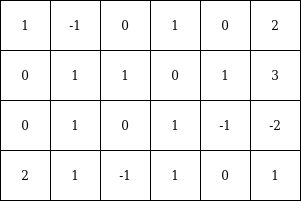



In [3]:
import numpy as np

input = np.array([[1,-1,0,1,0,2],
              [0,1,1,0,1,3],
              [0,1,0,1,-1,-2],
              [2,1,-1,1,0,1]])

filter_size = 2
stride = 2


height_in = input.shape[0] 
width_in = input.shape[1] 

height_out = int((height_in - filter_size) / stride) + 1 
width_out = int((width_in - filter_size) / stride) + 1 


output = np.zeros((height_out, width_out))


for i in range(height_out):
    for j in range(width_out):
        row_start  = i*stride
        row_end = row_start + filter_size
        col_start = j*stride
        col_end = col_start + filter_size
        output[i,j] = np.mean(input[row_start:row_end, col_start:col_end])

print(output)

[[ 0.25  0.5   1.5 ]
 [ 1.    0.25 -0.5 ]]



**Answer:**

***

3. Assume there is a tensor with a size of (2, 32, 64, 64) for (batch size, channels, height, width) as input and a convolution layer with output channel = 64, kernel size = 3x3. What is the number of parameters of this convolution layer with and without the bias?





**Answer:**

Input channel = 32 
Output channel = 64

This means the number of filters = output channels = 64 

Filter(Kernel) size = 3 x 3

The number of paramters with bias is calculated by 

$$
\left((\text{Kernel height} \times \text{Kernel width} \times \text{Input channels}) + 1 \right) \times \text{Number of filters} = \left((3 \times 3 \times 32) + 1 \right) \times 64 = 18496
$$

The number of paramters without bias is calculated by 
$$
(\text{Kernel height} \times \text{Kernel width} \times \text{Input channels})  \times \text{Number of filters} = (3 \times 3 \times 32) \times 64 = 18432
$$  


The number of parameters in the convolutional layer is 18496 with the bias term and 18432 without the bias term.


## Programming Questions (Question 4: 40 points, Question 5, 40 points)

In [4]:
# Load MNIST dataset. DO NOT modify the below code.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False, cache=False, parser='auto')
X = mnist.data.astype('float32')
y = mnist.target.astype('int64')

X,y
# Image is already flattened to 1D since we use as_frame = false and we get numpy array in return

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, ..., 4, 5, 6], dtype=int64))

4. Training an image classifier for MNIST dataset by MLP layers and convolutional layers.
----------------------------

Please finish the following steps in order:

*   Load and normalize the MNIST dataset.
*   Split the data into training, validation and testing set.
*   Define a model with several multi-layer perceptron layers(MLP). Don’t use convolution layers.
*   Define a loss function
*   Train the network on the training data
*   Plot the training loss and validation loss as a function of epochs.
*   Plot the both training accuracy and validation accuracy as a function of epochs.
*   Test the network on the test data via printing the testing accuracy.



About Dataset - Modified National Institute of Standards and Technology(MNIST) database is having 70,000 grayscale images of handwritten digits from 0 to 9, each digit of size 28x28 pixels flattened into a 1D array of 784 features.

Normalization means to scale the features to the same range (in case of image [0,1]) so that each pixel value is given equal weightage in terms of consideration. This prevents features with larger magnitudes from dominating the optimization process.It is done by dividing each value with the maximum pixel value (255)

One hot encoding of y vector is done to convert every sample's output into a binary vector of all possible outputs where we mention 'one' only for the corresponding index (element) of the output  and zero otherwise. It is generally done in multi class classification.

In [5]:
# Normalization -(Feature) scaling the pixel value to range [0,1] - divide by maximum pixel value (255)

import tensorflow as tf

X_normalized = X / 255.0
no_of_classes = 10
y_one_hot = tf.one_hot(y, no_of_classes)
y_one_hot = y_one_hot.numpy()

# we need both X and y to be of same type for further computaion

In [6]:

print(type(X_normalized),type(y_one_hot))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [7]:
# Split the data into training, validation, and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_one_hot, test_size=10000, random_state=15)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=15)


In [8]:
print(X_normalized.shape,X_train.shape,X_val.shape,X_test.shape)
print(y_one_hot.shape,y_train.shape,y_val.shape,y_test.shape)


(70000, 784) (48000, 784) (12000, 784) (10000, 784)
(70000, 10) (48000, 10) (12000, 10) (10000, 10)


Multi layer perceptron is a neural network where every node in one layer is connected to every node in the next layer. It is a fully connected neural network and the features learnt at each layer are linear combination and then they go through the activation function for introducing non-linearity so that they become differentiable at the time of optimization.

We have a total of 5 layer which comprises a input layer, 3 hidden layers and output layer. The intermediate layers are called hidden layers because the expected output(ground truth) is visible only at the output layer and we can only compute the error at the ouput layer . We do not know the error at the intermediate layers as we do not know the perfect value it should have been. Hence, they are called hidden layers.

The input layer does not perform any function on the input, it only acts as an interface and just passes the input to the first hidden layer through the weighted edge. The intermediate layers have an activation non-linear function  "Relu" (Rectifying Linear Unit which outputs 0 when z < 0 and z otherwise ).It helps to learn complex patterns and relationships in the data.

The final output layer uses the softmax function which calculates the probabilities of the classes (such that they sum up to 1)  and the class with higher probability is the predicted class it belongs to.

In [9]:
# Define a model with several multi-layer perceptron layers(MLP). Don’t use convolution layers.

# (weights) kernel_initializer='glorot_uniform', bias_initializer='zeros' by default


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

mlp = Sequential()
mlp.add(Input(shape = (784,)))
mlp.add(Dense(units=512, activation='relu'))
mlp.add(Dense(units=256, activation='relu'))
mlp.add(Dense(units=128, activation='relu'))
mlp.add(Dense(units = no_of_classes, activation='softmax'))



We have used the loss function to be categorical cross entropy  as we have one-hot encoded targets and the optimization algorithm used is SGD (Stochastic gradient algorithm with learning rate 0.01)

In [10]:
# Define loss function and configure the model for training

from tensorflow.keras.losses import categorical_crossentropy

optimizer = SGD(learning_rate=0.01)
loss_function = categorical_crossentropy

mlp.compile(loss=loss_function, optimizer= optimizer, metrics=['accuracy'])

The library fit function used in the model does the major part of training in steps detailed below.

1. Forward Pass (linear function of features + activation function(Relu) at each layer)
2. Loss Computation at the output layer based on categorical cross entropy loss 
3. Backward Pass (Backpropagation) used to find the gradients of the hidden layers by using chain rule of differentiation
4. Parameter Update using SGD (updating the weights and bias parameters to minimize loss function value with the help of the gradients computed above )
5. Iterate through above 4 steps based on number of epochs

Batch - Since the dataset is larger, we use batches of data at a given time for efficient computation. One epoch/iteration completes when the entire training dataset is scanned through multiple batches.The weights are updated for each batch inside each epoch, resulting in multiple updates for each epoch, therby helping faster learning.

Batch and epoch values are chosen based on trying different combinations to get the efficient accuracy.

In [11]:
# Training the model using the fit method from tf

batch_size = 64
epochs = 30

trained_mlp = mlp.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))



Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6512 - loss: 1.3689 - val_accuracy: 0.8927 - val_loss: 0.3969
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8973 - loss: 0.3679 - val_accuracy: 0.9139 - val_loss: 0.3021
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9178 - loss: 0.2865 - val_accuracy: 0.9282 - val_loss: 0.2553
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9279 - loss: 0.2494 - val_accuracy: 0.9349 - val_loss: 0.2283
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9354 - loss: 0.2204 - val_accuracy: 0.9405 - val_loss: 0.2077
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9460 - loss: 0.1922 - val_accuracy: 0.9478 - val_loss: 0.1909
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9480 - loss: 0.1767 - val_accuracy: 0.9505 - val_loss: 0.1748
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9530 - loss: 0.1617 - val_accuracy: 

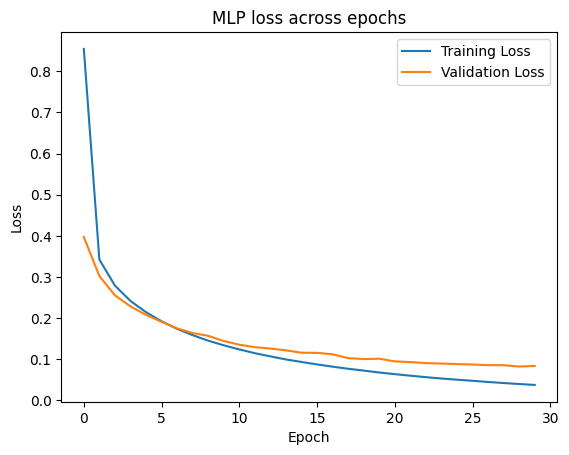

In [12]:
# Plot the training loss and validation loss as a function of epochs.

import matplotlib.pyplot as plt

plt.plot(trained_mlp.history['loss'],label='Training Loss')
plt.plot(trained_mlp.history['val_loss'],label='Validation Loss')
plt.title('MLP loss across epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

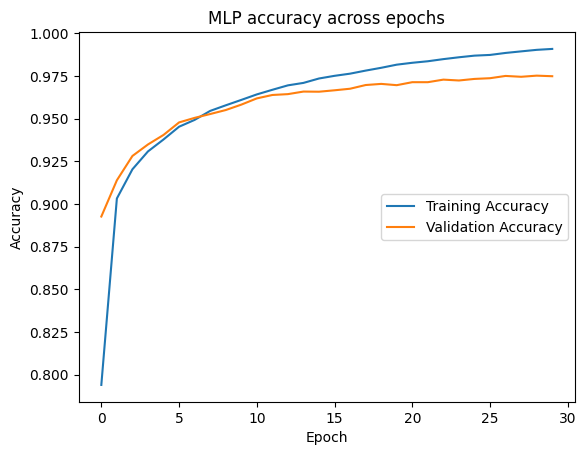

In [13]:
# Plot the both training accuracy and validation accuracy as a function of epochs.

plt.plot(trained_mlp.history['accuracy'],label='Training Accuracy')
plt.plot(trained_mlp.history['val_accuracy'],label='Validation Accuracy')
plt.title('MLP accuracy across epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()


In [14]:
# Test the network on the test data via printing the testing accuracy.

test_loss_mlp, test_acc_mlp = mlp.evaluate(X_test, y_test, verbose=0)

print(f"Testing Accuracy: {test_acc_mlp*100:.2f} %")

Testing Accuracy: 97.54 %


The MLP model used has 3 hidden layers, Relu activation function, categorical cross entropy loss, SGD optimization algorithm with learning rate 0.01, bacth size 64 and epoch 30.

Training accuracy obtained is 99 % 
Validation accuracy is 97.5 %
Testing accuracy is 97.54 %

5. Please finish the following steps in order:


*   Define a model with several 2D convolution layers, pooling layers, activate function, and normalization layers.
*   Define the same loss function
*   Train the network on the training data
*   Plot the training loss and validation loss as a function of epochs.
*   Plot the both training accuracy and validation accuracy as a function of epochs.
*   Test the network on the test data via printing the testing accuracy, and Compare to the previous result.

Hints: the last dimension of data denotes a flattened tensor from 2D images, specifically [Batch size, HxW]. You can reshape the data to a shape of [Batch size, 1(channel), 28(H), 28(W)] as the input size for a convolution-based model.



In [15]:
# Note - The X vectors below are taken from MLP model where we have already normalized the vector and split them as train,test and validation sets
# Reshaping the input for Convolution-based model

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_val = X_val.reshape(X_val.shape[0], 28, 28, 1)

In [16]:
print(X_normalized.shape,X_train.shape,X_val.shape,X_test.shape)
print(y_one_hot.shape,y_train.shape,y_val.shape,y_test.shape)


(70000, 784) (48000, 28, 28, 1) (12000, 28, 28, 1) (10000, 28, 28, 1)
(70000, 10) (48000, 10) (12000, 10) (10000, 10)


CNN is a neural network where nodes in one layer is connected to nodes in the next layer (not neccessarily all of them). It may contain some fully connected layers and the features learnt at each layer are non-linear combination using the method of kernel/filter and then they go through the activation function for introducing non-linearity again so that they become differentiable at the time of optimization.

We have a total of 5 hidden layers which comprises of 3 convolution layers and 2 Max pooling layer.The input layer does not perform any function on the input, it only acts as an interface and just passes the input to the first hidden layer through the weighted edge. The intermediate layers have an activation non-linear function  "Relu" (Rectifying Linear Unit which outputs 0 when z < 0 and ouputs z otherwise ).It helps to learn complex patterns and relationships in the data.

The final output layer uses the softmax function which calculates the probabilities of the classes (such that they sum up to 1)  and the class with higher probability is the predicted class it belongs to.


In [17]:
# Define a model with several 2D convolution layers, pooling layers, activate function, and normalization layers.


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import SGD

conv_nn = Sequential()
conv_nn.add(Input(shape = (28,28,1)))
conv_nn.add(Conv2D(32, (3, 3), activation='relu'))
conv_nn.add(MaxPooling2D((2, 2)))
conv_nn.add(Conv2D(64, (3, 3), activation='relu'))
conv_nn.add(MaxPooling2D((2, 2)))
conv_nn.add(Conv2D(64, (3, 3), activation='relu'))
conv_nn.add(Flatten())
conv_nn.add(Dense(64, activation='relu'))
conv_nn.add(Dense(no_of_classes, activation='softmax'))



In Convolution layer 1 ->A kernel filter of size 3 x 3 slides over the entire sample's pixel input of size 28 x 28 caputuring the local features of the input (by dot product of weights and biases ) and there are 32 such kernels that try diffreent non linear combinations with each kernel running over the entire pixel each time.

At each position of a given kernel, the dot product calculation between the filter weights and the input pixel values captures local patterns or features in the input image. By summing up the dot products across positions, the convolutional layer produces a feature map that represents the presence of these features at different locations in the input image.Each filter has different  intialized weights and thus they produce different feature maps at each layer. These features are further fine tuned by updating the weights based on the backpropogation algorithm.

Max pooling - It is used to reduce the spatial dimensions of the inputs without feature information loss for efficient computation at further layers and to control overfitting.

The above steps are repeated in subsequent convolution and Maxpool layers layers. Before giving the input to ouput layer, the feature vector is flattened to get a 1d vector so that we get the linear tranformation from which the probabilities of the classes are claculated using softmax function at the output layer.


In [18]:
# Define loss function and configure the model for training

from tensorflow.keras.losses import categorical_crossentropy

optimizer = SGD(learning_rate=0.1)
loss_function = categorical_crossentropy

conv_nn.compile(loss=loss_function, optimizer= optimizer, metrics=['accuracy'])

We have used the loss function to be categorical cross entropy  as we have one-hot encoded targets and the optimization algorithm used is SGD (Stochastic gradient algorithm with learning rate 0.1)

The library fit function used in the model does the major part of training in steps detailed below.

1. Forward Pass (linear function of features + activation function(Relu) at each layer)
2. Loss Computation at the output layer based on categorical cross entropy loss 
3. Backward Pass (Backpropagation) used to find the gradients of the hidden layers by using chain rule of differentiation
4. Parameter Update using SGD (updating the weights and bias parameters to minimize loss function value with the help if the gradients computed above )
5. Iterate through above 4 steps based on number of epochs

Batch - Since the dataset is larger, we use batches of data at a given time for efficient computation. One epoch/iteration completes when the entire training dataset is scanned through multiple batches.The weights are updated for each batch inside each epoch, resulting in multiple updates for each epoch, therby helping faster learning.

Batch and epoch values are chosen based on trying different combinations to get the efficient accuracy.

In [19]:
# Training the model using the fit method from tf

batch_size = 100
epochs = 20

trained_conv_nn = conv_nn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_val, y_val))


Epoch 1/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 30s 58ms/step - accuracy: 0.7340 - loss: 0.8146 - val_accuracy: 0.9722 - val_loss: 0.0960
Epoch 2/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 50s 77ms/step - accuracy: 0.9703 - loss: 0.0936 - val_accuracy: 0.9829 - val_loss: 0.0618
Epoch 3/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 31s 65ms/step - accuracy: 0.9800 - loss: 0.0627 - val_accuracy: 0.9852 - val_loss: 0.0523
Epoch 4/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 40s 62ms/step - accuracy: 0.9849 - loss: 0.0466 - val_accuracy: 0.9845 - val_loss: 0.0549
Epoch 5/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.9877 - val_loss: 0.0452
Epoch 6/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9894 - loss: 0.0315 - val_accuracy: 0.9879 - val_loss: 0.0450
Epoch 7/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 42s 56ms/step - accuracy: 0.9915 - loss: 0.0273 - val_accuracy: 0.9875 - val_loss: 0.0461
Epoch 8/20
480/480 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.9924 - loss: 0.0234 - 

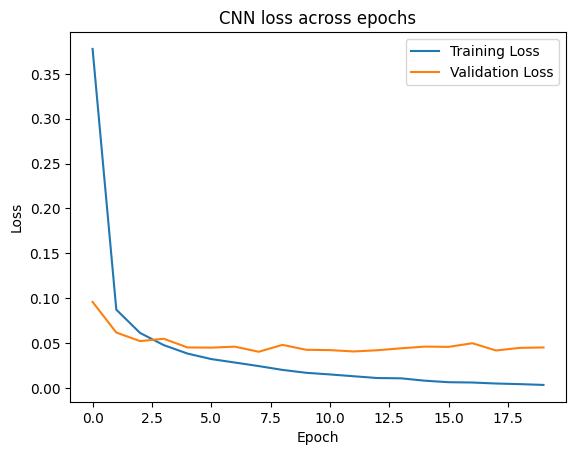

In [20]:
# Plot the training loss and validation loss as a function of epochs.

import matplotlib.pyplot as plt

plt.plot(trained_conv_nn.history['loss'],label='Training Loss')
plt.plot(trained_conv_nn.history['val_loss'],label='Validation Loss')
plt.title('CNN loss across epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

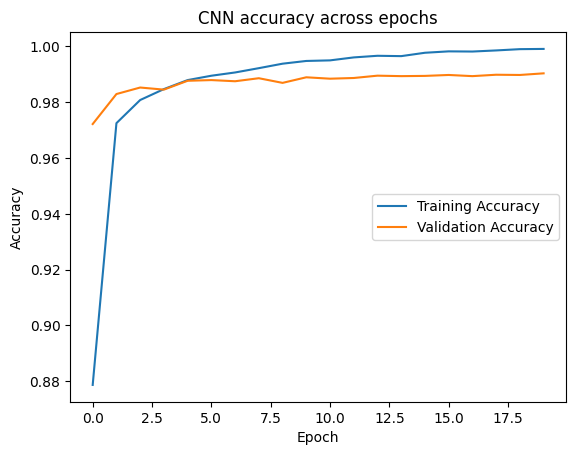

In [21]:

# Plot the both training accuracy and validation accuracy as a function of epochs.

plt.plot(trained_conv_nn.history['accuracy'],label='Training Accuracy')
plt.plot(trained_conv_nn.history['val_accuracy'],label='Validation Accuracy')
plt.title('CNN accuracy across epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='center right')
plt.show()

In [22]:

# Test the network on the test data via printing the testing accuracy.

test_loss_cnn, test_acc_cnn = conv_nn.evaluate(X_test, y_test, verbose=0)

print(f"Testing Accuracy: {test_acc_cnn*100:.2f} %")

Testing Accuracy: 99.07 %


The CNN model used has 5 hidden layers (3 Convolutional Layers + 2 MaxPooling Layers, Relu activation function, categorical cross entropy loss, SGD optimization algorithm with learning rate 0.1, bacth size 100 and epoch 20.

Training accuracy obtained is 99.9 % 
Validation accuracy is 99.0 %
Testing accuracy is 99.07 %

In [23]:
#  Comparison accuracies of training,test,validation in MLP and CNN

import pandas as pd
from tabulate import tabulate


data = {
    "Model": ["MLP", "CNN"],
    "Training Accuracy (%) ": ["{:.2f}".format(trained_mlp.history['accuracy'][-1]*100), "{:.2f}".format(trained_conv_nn.history['accuracy'][-1]*100)],
    "Validation Accuracy (%) ": ["{:.2f}".format(trained_mlp.history['val_accuracy'][-1]*100), "{:.2f}".format(trained_conv_nn.history['val_accuracy'][-1]*100)],
    "Test Accuracy (%) ": ["{:.2f}".format(test_acc_mlp*100), "{:.2f}".format(test_acc_cnn*100)]    
    
}

df = pd.DataFrame(data)

df.set_index("Model", inplace=True)

print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒═════════╤══════════════════════════╤════════════════════════════╤══════════════════════╕
│ Model   │   Training Accuracy (%)  │   Validation Accuracy (%)  │   Test Accuracy (%)  │
╞═════════╪══════════════════════════╪════════════════════════════╪══════════════════════╡
│ MLP     │                    99.09 │                      97.49 │                97.54 │
├─────────┼──────────────────────────┼────────────────────────────┼──────────────────────┤
│ CNN     │                    99.91 │                      99.03 │                99.07 │
╘═════════╧══════════════════════════╧════════════════════════════╧══════════════════════╛


Thus, we see from above comparison that CNN performs better than the MLP network due to use of convolution layers which majorly relies on the kernel filters that helps in non-linearly learning the complex features in the dataset.